In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets as ds
from sklearn import preprocessing as pp
import matplotlib as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/中興大學-資料探勘/openpowerlifting.csv")
df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

In [4]:
SBD = df.loc[:,['Equipment','Wilks','McCulloch','Glossbrenner','IPFPoints']].dropna()
SBD_1 = df.loc[:,['Wilks','McCulloch','Glossbrenner','IPFPoints']].dropna()
SBD.head()

,Equipment,Wilks,McCulloch,Glossbrenner,IPFPoints
0,Wraps,324.16,324.16,286.42,511.15
1,Wraps,378.07,378.07,334.16,595.65
2,Raw,38.56,38.56,34.12,313.97
3,Wraps,345.61,345.61,305.37,547.04
4,Wraps,321.25,338.91,274.56,550.08


In [5]:
SBD.isna().sum()

Equipment       0
Wilks           0
McCulloch       0
Glossbrenner    0
IPFPoints       0
dtype: int64

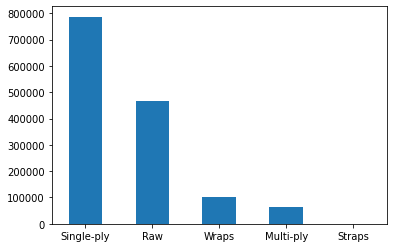

In [53]:
df['Equipment'].value_counts().plot(kind="bar",rot=0)

In [ ]:
df['Sex'].value_counts().plot(kind="bar",rot=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36ff59290>,
      dtype=object)

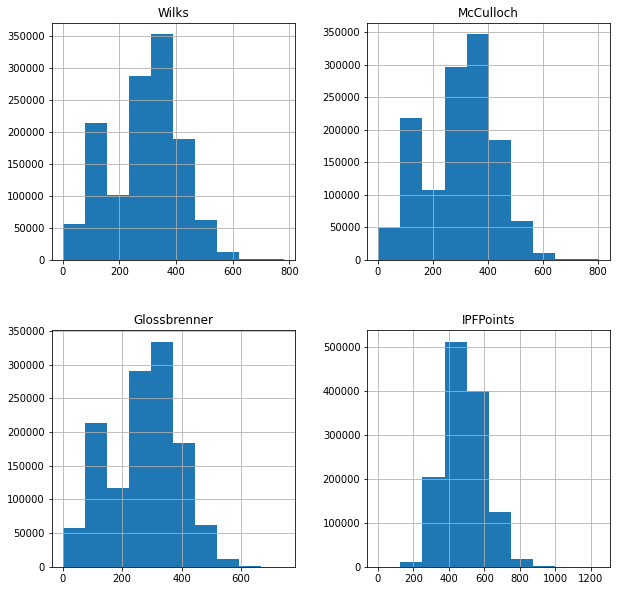

In [7]:
SBD.head(10)
SBD.hist(figsize=(10,10))

In [8]:
n_SBD = (SBD.groupby('Equipment').apply(lambda df: print(df.head(), '\n')) )

     Equipment   Wilks  McCulloch  Glossbrenner  IPFPoints
396  Multi-ply  329.88     329.88        289.13     461.36
397  Multi-ply  493.66     493.66        468.23     555.98
398  Multi-ply  366.95     366.95        354.36     470.47
399  Multi-ply  305.92     503.23        294.12     393.71
400  Multi-ply  491.11     491.11        461.09     523.21 

   Equipment   Wilks  McCulloch  Glossbrenner  IPFPoints
2        Raw   38.56      38.56         34.12     313.97
11       Raw  333.24     333.24        285.55     571.03
14       Raw  290.95     302.58        256.21     486.30
19       Raw  353.56     353.56        310.54     599.76
21       Raw  294.98     294.98        259.82     492.05 

       Equipment   Wilks  McCulloch  Glossbrenner  IPFPoints
82    Single-ply   98.38      98.38         95.01     495.77
5919  Single-ply  121.29     143.61        117.12     574.05
6622  Single-ply  537.05     537.05        514.64     637.68
8185  Single-ply  423.91     423.91        407.86     52

                 Wilks  McCulloch  Glossbrenner  IPFPoints
Wilks         1.000000   0.985706      0.995370   0.263066
McCulloch     0.985706   1.000000      0.981568   0.245303
Glossbrenner  0.995370   0.981568      1.000000   0.262004
IPFPoints     0.263066   0.245303      0.262004   1.000000


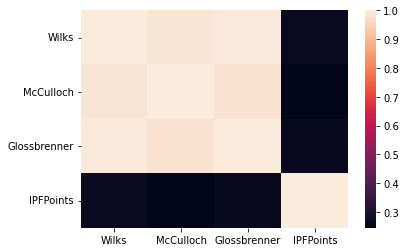

In [9]:
import seaborn as sns

cor = SBD.corr()
print(cor)
sns.heatmap(cor)

In [10]:
k = 9
wilks_cut = pd.cut(SBD['Wilks'],k,labels=range(k))
wilks_cut

0          3
1          4
2          0
3          3
4          3
          ..
1423347    4
1423348    4
1423349    3
1423350    3
1423351    3
Name: Wilks, Length: 1273138, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]

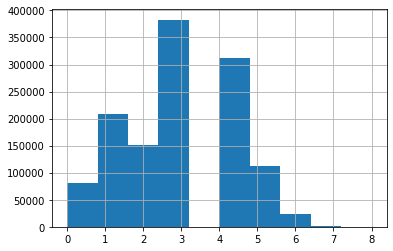

In [11]:
wilks_cut.hist()

In [12]:
from sklearn.preprocessing import StandardScaler

features = ['Wilks','McCulloch','Glossbrenner','IPFPoints']
x = SBD.loc[:,features].values
y = SBD.loc[:,['Equipment']].values
x = StandardScaler().fit_transform(x)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
model = pca.fit_transform(x)
df_SBD = pd.DataFrame(data = model,columns = ['pc1','pc2'])
pcaSBD = pd.concat([df_SBD,SBD[['Equipment']]],axis = 1).dropna()
pcaSBD

,pc1,pc2,Equipment
0,0.382056,0.149801,Wraps
1,1.255038,0.724560,Wraps
2,-3.775714,-0.735471,Raw
3,0.733391,0.398100,Wraps
4,0.450137,0.484279,Wraps
...,...,...,...
1273133,2.050427,0.119726,Raw
1273134,2.056481,0.018457,Raw
1273135,0.973347,-0.360883,Raw
1273136,0.388337,-0.651878,Raw


In [50]:
from matplotlib import figure

fig = figure.Figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1',fontsize = 15)
ax.set_ylabel('pc1',fontsize = 15)
ax.set_title('SBD PCA',fontsize = 20)
targets = ['Raw','Wraps','Straps','Multi-ply','Single-ply']
colors = ['red','blue','green','pink','yellow']

for target,color in zip(targets,colors):
  indicesTokeep = pcaSBD['Equipment'] == target
  ax.scatter(pcaSBD.loc[indicesTokeep,'pc1']
        ,pcaSBD.loc[indicesTokeep,'pc2']
        ,c = color
        ,s = 50)
ax.legend(targets)
ax.grid()

In [15]:
from sklearn import feature_selection as fs
target_1 = SBD['Equipment'].values
skb = fs.SelectKBest(fs.f_classif,k=3)
skb.fit_transform(SBD_1,target_1)

array([[324.16, 286.42, 511.15],
       [378.07, 334.16, 595.65],
       [ 38.56,  34.12, 313.97],
       ...,
       [327.07, 316.52, 469.67],
       [304.16, 295.66, 423.03],
       [274.48, 264.22, 378.84]])

In [16]:
from sklearn.model_selection import train_test_split

X=SBD.drop(['Equipment'],axis=1)
y=SBD['Equipment']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

list1 = [X_train,X_test,y_train,y_test]
print(list1)

[          Wilks  McCulloch  Glossbrenner  IPFPoints
946612    86.09      91.25         76.40     605.88
665117   129.81     146.69        125.35     603.72
285919   230.44     230.44        220.51     301.68
1116777  274.81     274.81        242.41     392.67
229602   258.86     258.86        227.82     434.27
...         ...        ...           ...        ...
238426   365.25     575.64        352.73     468.58
72573    147.55     147.55        143.16     691.51
971445   147.27     155.37        142.33     670.06
236205   301.86     301.86        290.15     421.87
1238724  208.61     208.61        183.48     351.23

[1018510 rows x 4 columns],           Wilks  McCulloch  Glossbrenner  IPFPoints
306567   324.32     324.32        311.12     408.81
718499   363.97     363.97        348.54     514.45
1306119  319.20     319.20        307.60     413.54
1130135  269.76     269.76        239.17     367.01
520893   240.03     240.03        232.60     330.36
...         ...        ...        

In [17]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()
tree.fit(SBD_1,target_1)
tree.feature_importances_

array([0.38612348, 0.09188571, 0.15677594, 0.36521487])

In [19]:
from sklearn import ensemble as es
from sklearn import feature_selection as fs 
rfc = es.RandomForestClassifier(n_estimators=10)
rfc.fit(SBD_1,target_1)
rfc.feature_importances_

# sfm = fs.SelectFromModel(es.RandomForestClassifier(n_estimators=10),0.37)
# sfm.fit_transform(SBD_1,target_1)

array([0.23479678, 0.15110769, 0.20214532, 0.41195021])

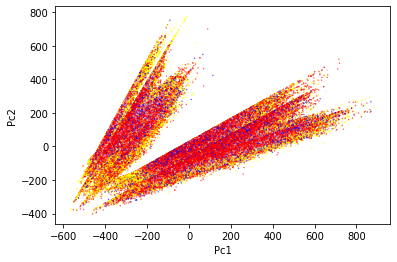

In [52]:
from sklearn import decomposition as dc
from sklearn.decomposition import PCA

pca = dc.PCA(n_components=2)
pcs = pca.fit_transform(SBD_1,target_1)
# scree_plot = pd.Series(pca.explained_variance_ratio_,index=['pc1','pc2','pc3','pc4']).plot.bar(title='Screen plot',rot=0)

df_1 = pd.DataFrame(pcs,columns=['Pc1','Pc2'])
df_1 = pd.concat([df_1,SBD[['Equipment']]],axis = 1).dropna()
color = ['red' if t=='Raw' else 'blue' if t=='Wraps' else 'green' if t=='Straps' else 'pink' if t=='Multi-ply' else 'yellow' if t=='Single-ply' else 'black' for t in df_1['Equipment']]
df_1.plot.scatter(0,1,s=0.1,c=color)
